In [1]:
import dalex as dx
import pandas as pd
import pickle
import numpy as np

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# Data and models read

In [2]:
input_df = pd.read_csv('preprocessed_dataset.csv')
y = input_df.loc[:,'Attrition']
X = input_df.drop('Attrition', axis='columns')

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=14)

In [3]:
lr = pickle.load(open( 'l1_log_reg.p', "rb" ))
lr_explainer = dx.Explainer(lr, X_train, y_train, label='Logistic Regresion')

Preparation of a new explainer is initiated

  -> data              : 7595 rows 21 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 7595 values
  -> model_class       : sklearn.linear_model._logistic.LogisticRegression (default)
  -> label             : Logistic Regresion
  -> predict function  : <function yhat_proba_default at 0x7f93c22168b0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 4.17e-06, mean = 0.159, max = 0.984
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.879, mean = 0.000387, max = 0.999
  -> model_info        : package sklearn

A new explainer has been created!


/Users/dtgt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.24.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [4]:
XGB = pickle.load(open( 'xgb_model.p', "rb" ))
XGB_explainer = dx.Explainer(XGB, X_train, y_train, label='XGBoost')

Preparation of a new explainer is initiated

  -> data              : 7595 rows 21 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 7595 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : XGBoost
  -> predict function  : <function yhat_proba_default at 0x7f93c22168b0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 1.49e-06, mean = 0.159, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.699, mean = 9.19e-05, max = 0.82
  -> model_info        : package xgboost

A new explainer has been created!


In [5]:
RF = pickle.load(open( 'random_forest_model.p', "rb" ))
RF_explainer = dx.Explainer(RF, X_train, y_train, label='Random Forest')

Preparation of a new explainer is initiated

  -> data              : 7595 rows 21 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 7595 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : Random Forest
  -> predict function  : <function yhat_proba_default at 0x7f93c22168b0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.159, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.37, mean = 0.000521, max = 0.44
  -> model_info        : package sklearn

A new explainer has been created!


# EDA

In [11]:
EDA_df = input_df.copy()

EDA_df.Attrition = EDA_df.applymap(lambda x: 'Attrited' if x else 'Existing').Attrition

In [12]:
EDA_df = pd.read_csv('BankChurners.csv')

EDA_df.drop('CLIENTNUM', axis=1, inplace=True)

EDA_df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'], 
          inplace=True, axis=1)

EDA_df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], 
          inplace=True, axis=1)

EDA_df.Attrition_Flag = EDA_df.applymap(lambda x: 'Attrited' if x != "Existing Customer" else 'Existing').Attrition_Flag

In [37]:
existing = EDA_df.applymap(lambda x: 0 if x != "Existing" else 1).Attrition_Flag.sum()
attrited = EDA_df.applymap(lambda x: 1 if x != "Existing" else 0).Attrition_Flag.sum()

print(f"Existing: {round(100 * existing/(attrited+existing), 2)} %")
print(f"Attrited: {round(100 * attrited/(attrited+existing), 2)} %")

Existing: 83.93 %
Attrited: 16.07 %


Text(0.95, 200, '16%')

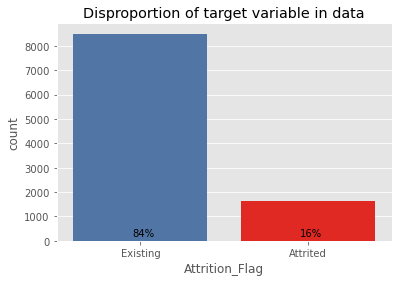

In [63]:
sns.countplot(x="Attrition_Flag", data = EDA_df, palette = ["#4374B3", "#FF0B04"])
plt.title('Disproportion of target variable in data')
plt.text(-0.05, 200, "84%")
plt.text(0.95, 200, "16%")

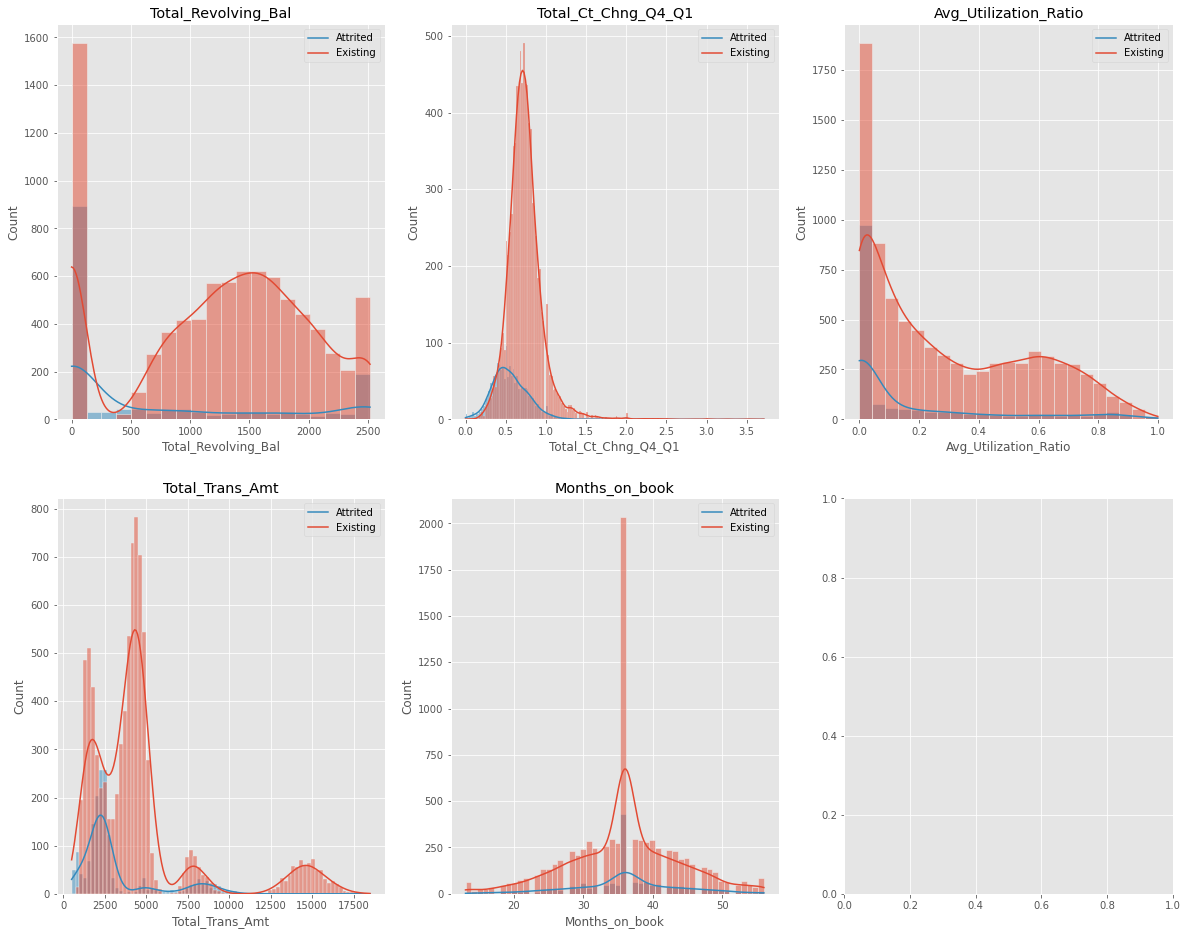

In [52]:
def plotHistPlotFlag(columns):
    fig, ax = plt.subplots(len(columns)//3+1, 3,figsize=(20, 16))
    
    index = 0
    for i in range(5):
        for j in range(3):
            if i*3+(j+1)>len(columns):
                break
            sns.histplot(data=EDA_df,
                         x=columns[index],
                         hue='Attrition_Flag',
                         kde=True,
                         ax=ax[i][j])
            ax[i][j].set_title(columns[index])
            ax[i][j].legend(labels=['Attrited', 'Existing'])
            index += 1
            
#plotHistPlotFlag(['Customer_Age','Credit_Limit','Months_on_book','Avg_Utilization_Ratio','Avg_Open_To_Buy','Total_Trans_Amt','Dependent_count',
 #                 'Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon','Total_Revolving_Bal',
  #                'Total_Amt_Chng_Q4_Q1','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1'])
plotHistPlotFlag(['Total_Revolving_Bal', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Total_Trans_Amt', 'Months_on_book'])

# Logistic Regression assumption

In [40]:
y_pred = lr.predict_proba(X_train)[:,1]

logit = np.log(y_pred/(1-y_pred))

plot_data = X_train.copy()
plot_data["logit"] = logit

1 of 20
2 of 20
3 of 20
4 of 20
5 of 20
6 of 20
7 of 20
8 of 20
9 of 20
10 of 20
11 of 20
12 of 20
13 of 20
14 of 20
15 of 20
16 of 20
17 of 20
18 of 20
19 of 20
20 of 20


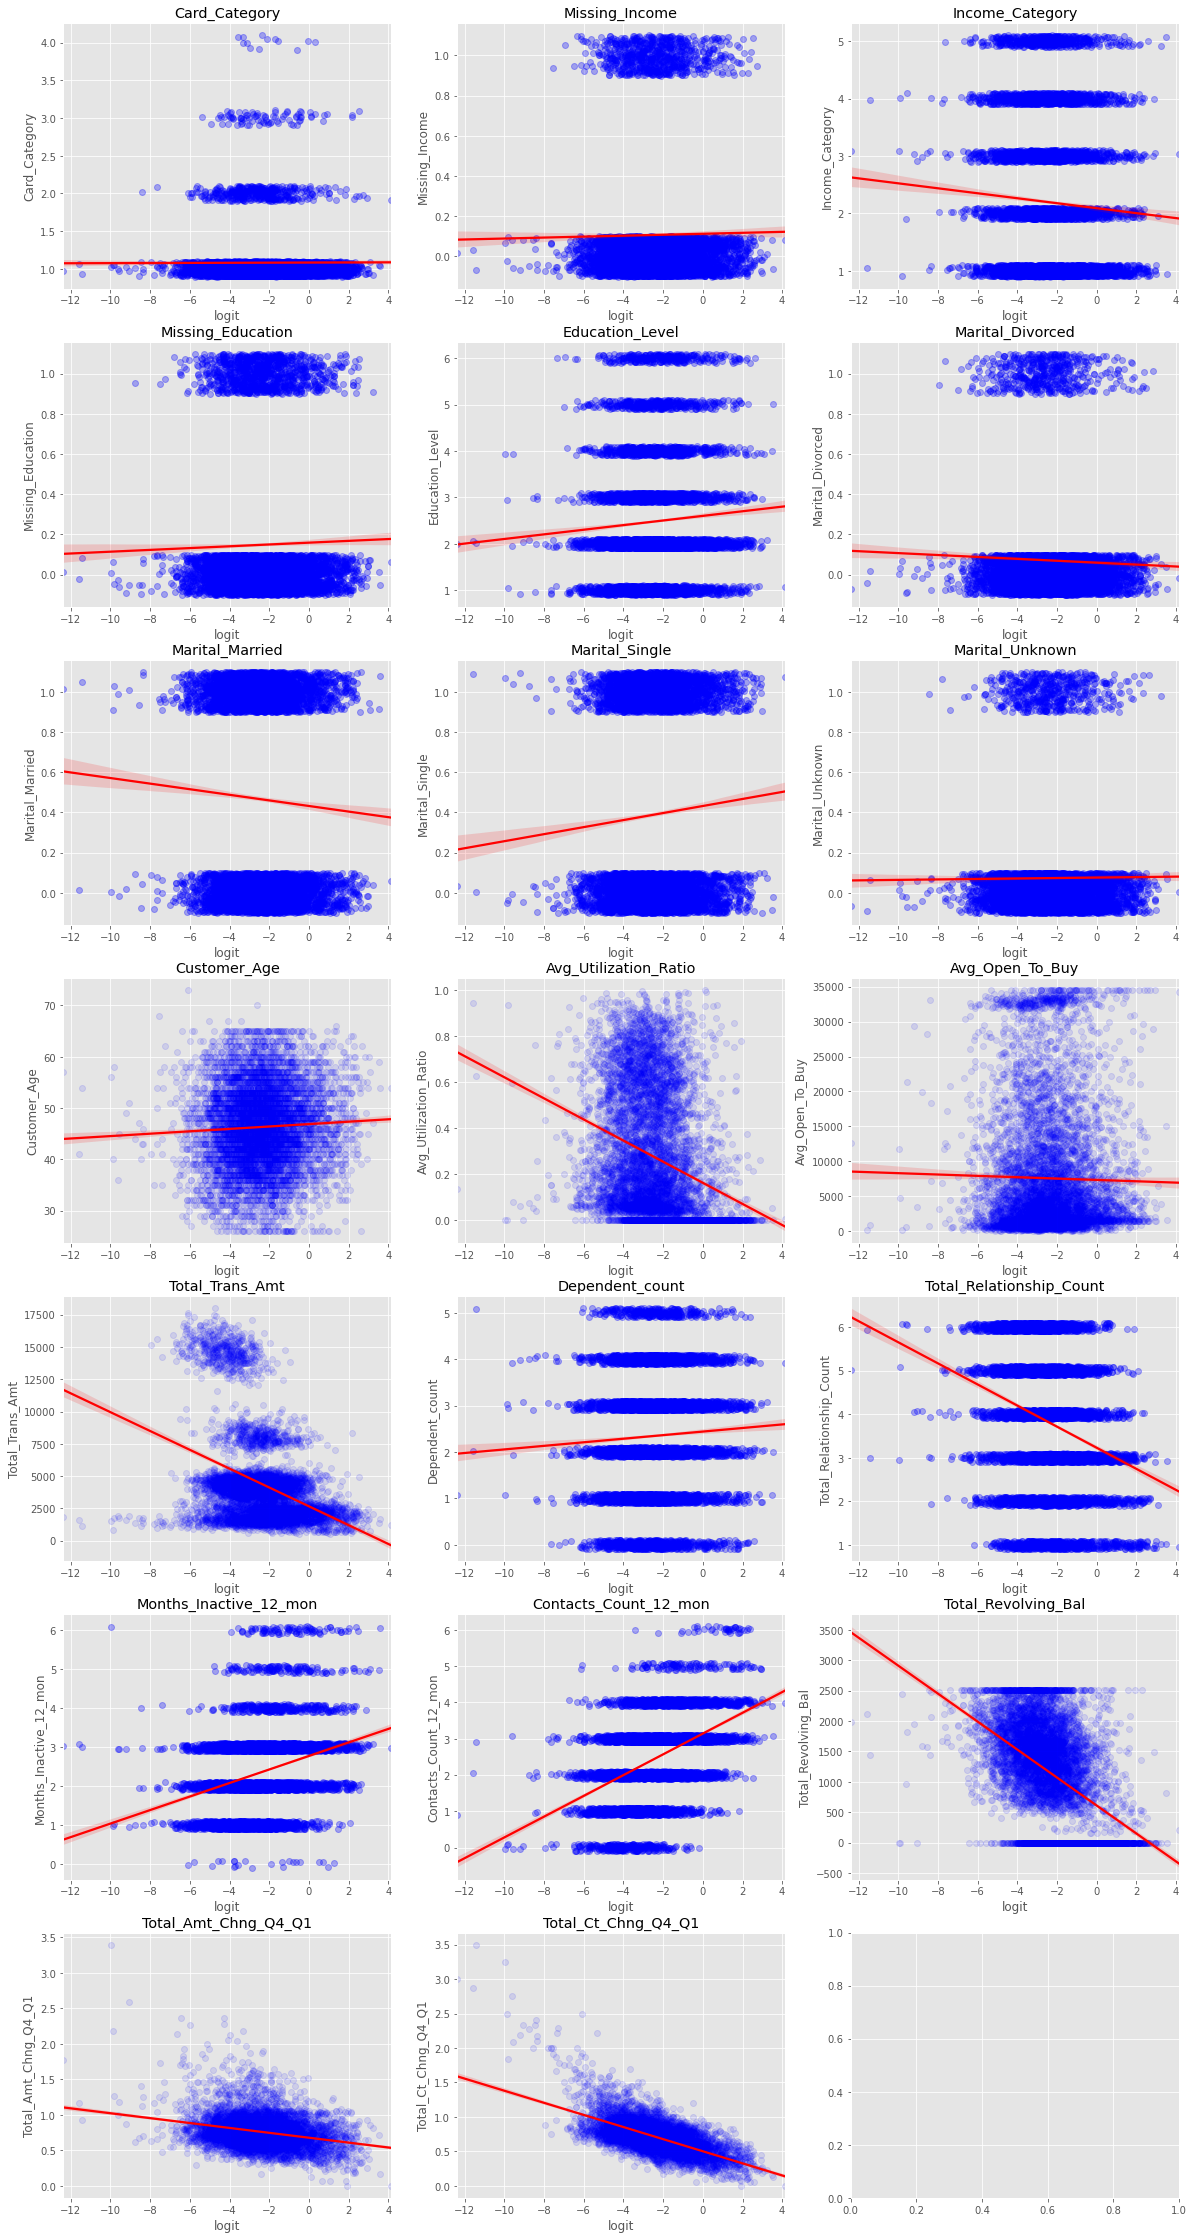

In [54]:
def plotLinearityAssumptionCheck(data):
    columns = data.columns[1:-1] # without 'logit' [1:-1]
    
    fig, ax = plt.subplots(len(columns)//3+1, 3,figsize=(20, 40))
    
    index = 0
    for i in range(7):
        for j in range(3):
            if i*3+(j+1)>len(columns):
                break
            print(f"{index+1} of {len(columns)}")
            
            if index in [0,1,2,3,4,5,6,7,8, 13,14,15,16]:
                sns.regplot(data=data, x="logit", y=columns[index], ax=ax[i][j], scatter_kws={'alpha':0.3, "color": "blue"}, line_kws={"color": "red"}, y_jitter=0.1)
            else:
                sns.regplot(data=data, x="logit", y=columns[index], ax=ax[i][j], scatter_kws={'alpha':0.1, "color": "blue"}, line_kws={"color": "red"})
            
            ax[i][j].set_title(columns[index])
            index += 1
            
plotLinearityAssumptionCheck(plot_data)